In [3]:
## Loan Approval Prediction

Data Id 📋
This dataset is named Loan Prediction Dataset data set. The dataset contains a set of 613 records under 13 attributes:

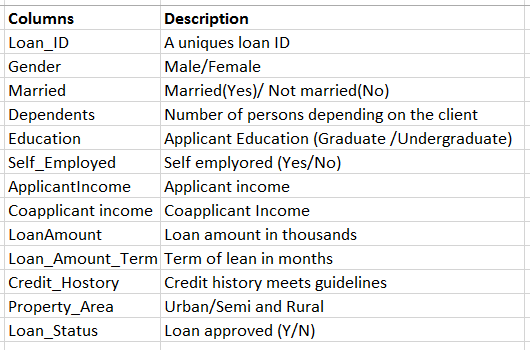


In [4]:
## Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
## Loading the dataset
df = pd.read_csv('LoanData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Checking the shape of the dataset
df.shape

(614, 13)

There are 614 rows and 13 columns

In [7]:
#Checking the datatypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The 3 datatypes are int, float and object

There are also null valuyes present in the dataset

In [8]:
#Checking the stats of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are outliers in applicantincome, coapplicant income and loan amount columns

In [9]:
#Checking the null values in each column
for col in df.columns:
    print('The column {} has {} null values'.format(col,df[col].isnull().sum()))

The column Loan_ID has 0 null values
The column Gender has 13 null values
The column Married has 3 null values
The column Dependents has 15 null values
The column Education has 0 null values
The column Self_Employed has 32 null values
The column ApplicantIncome has 0 null values
The column CoapplicantIncome has 0 null values
The column LoanAmount has 22 null values
The column Loan_Amount_Term has 14 null values
The column Credit_History has 50 null values
The column Property_Area has 0 null values
The column Loan_Status has 0 null values


In [10]:
df.columns = [col.lower() for col in df.columns]

In [11]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
num_cols = [col for col in df.columns if df[col].dtypes!='O']
cat_cols = [col for col in df.columns if df[col].dtypes=='O']

In [13]:
num_cols

['applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history']

In [14]:
cat_cols

['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [15]:
#Checking the number of unique values in each column
for col in df.columns:
    print('The column {} has {} unique values'.format(col,df[col].nunique()))

The column loan_id has 614 unique values
The column gender has 2 unique values
The column married has 2 unique values
The column dependents has 4 unique values
The column education has 2 unique values
The column self_employed has 2 unique values
The column applicantincome has 505 unique values
The column coapplicantincome has 287 unique values
The column loanamount has 203 unique values
The column loan_amount_term has 10 unique values
The column credit_history has 2 unique values
The column property_area has 3 unique values
The column loan_status has 2 unique values


In [16]:
# Visualizations
df.head(2)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Univariate Analysis

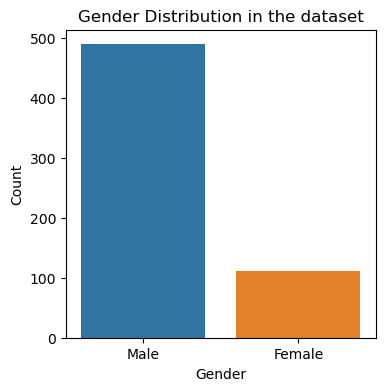

In [17]:
#Gender Distribution
plt.figure(figsize=(4,4))
plt.title('Gender Distribution in the dataset')
sns.countplot(data = df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Observation: There are more male applicants compared to female applicants

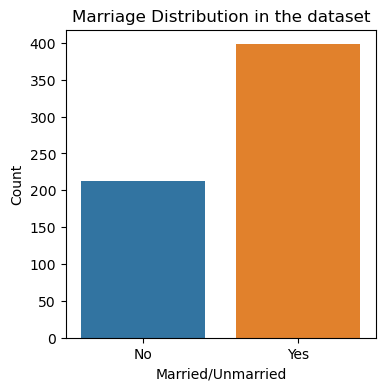

In [18]:
#Married/Unmarried Distribution
plt.figure(figsize=(4,4))
plt.title('Marriage Distribution in the dataset')
sns.countplot(data = df, x='married')
plt.xlabel('Married/Unmarried')
plt.ylabel('Count')
plt.show()

Observation: Most of the applicants are married

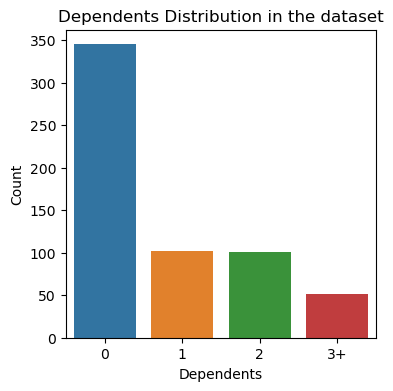

In [19]:
#Dependents Distribution
plt.figure(figsize=(4,4))
plt.title('Dependents Distribution in the dataset')
sns.countplot(data = df, x='dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Observation: Most of the applicants have no dependents

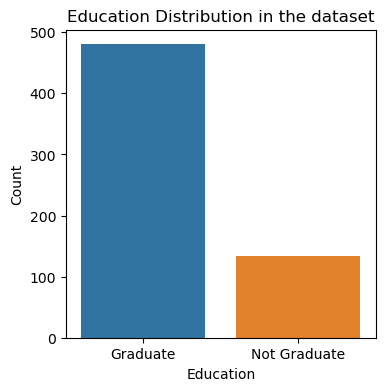

In [20]:
#Education Distribution
plt.figure(figsize=(4,4))
plt.title('Education Distribution in the dataset')
sns.countplot(data = df, x='education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Observation: Most of the applicants are graduates

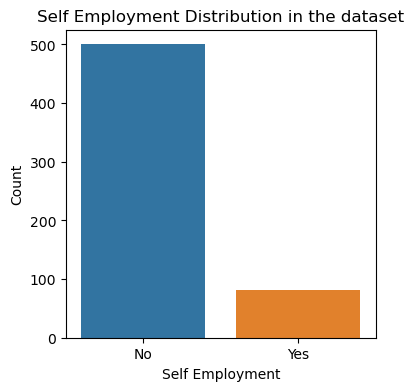

In [21]:
#Self Employment Distribution
plt.figure(figsize=(4,4))
plt.title('Self Employment Distribution in the dataset')
sns.countplot(data = df, x='self_employed')
plt.xlabel('Self Employment')
plt.ylabel('Count')
plt.show()

Observation: Most of the applicants are salaried

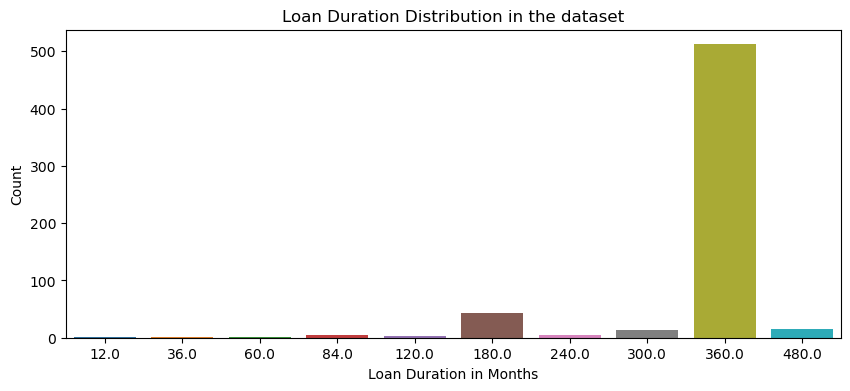

In [22]:
#Loan Duration Distribution
plt.figure(figsize=(10,4))
plt.title('Loan Duration Distribution in the dataset')
sns.countplot(data = df, x='loan_amount_term')
plt.xlabel('Loan Duration in Months')
plt.ylabel('Count')
plt.show()

Observation: Most of the loan applications have a term of 360 months

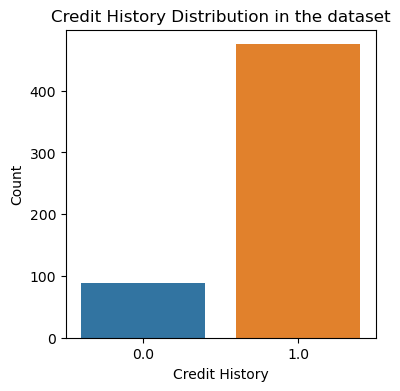

In [23]:
#Credit History Distribution
plt.figure(figsize=(4,4))
plt.title('Credit History Distribution in the dataset')
sns.countplot(data = df, x='credit_history')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

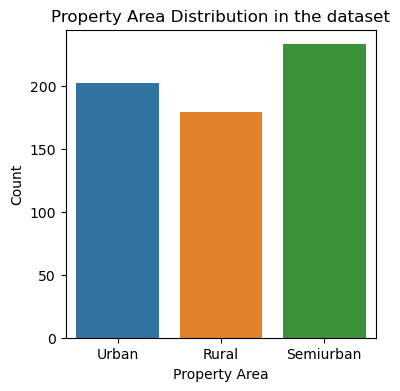

In [24]:
#Area Distribution
plt.figure(figsize=(4,4))
plt.title('Property Area Distribution in the dataset')
sns.countplot(data = df, x='property_area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

Observation: Most of the applications are from semi urban followed by urban and then rural

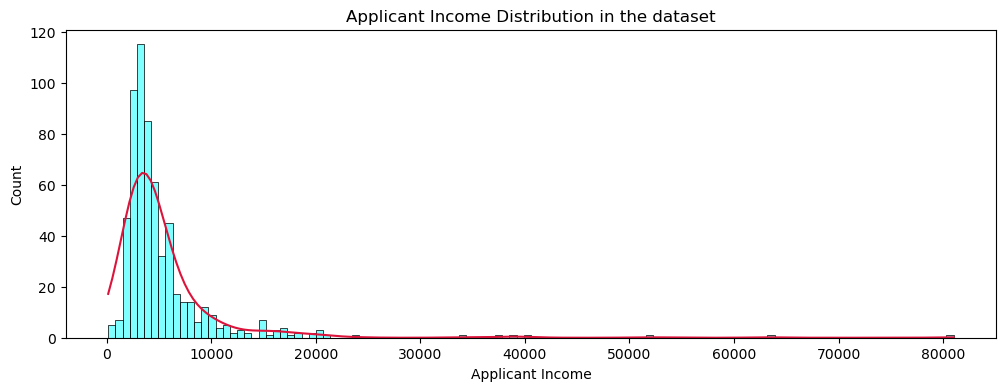

In [25]:
#Applicant Income Distribution
plt.figure(figsize=(12,4))
plt.title('Applicant Income Distribution in the dataset')
ax=sns.histplot(x=df.applicantincome,kde=True,color = 'cyan')
ax.lines[0].set_color('crimson')
plt.xlabel('Applicant Income')
plt.show()

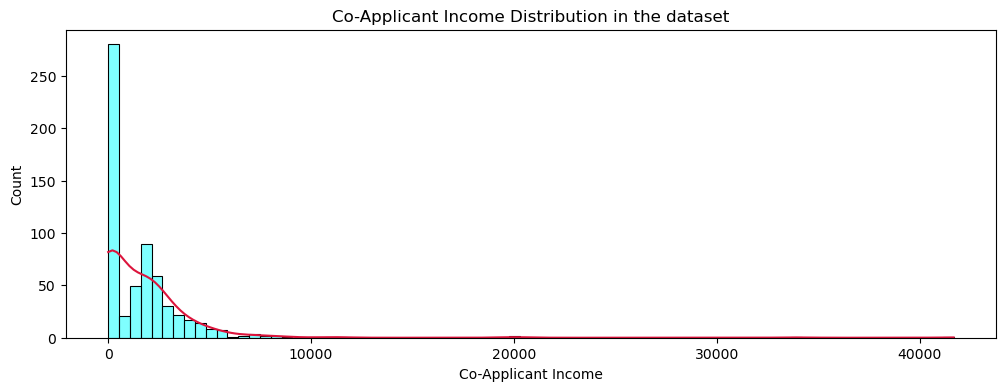

In [26]:
#Co-Applicant Income Distribution
plt.figure(figsize=(12,4))
plt.title('Co-Applicant Income Distribution in the dataset')
ax=sns.histplot(x=df.coapplicantincome,kde=True,color = 'cyan')
ax.lines[0].set_color('crimson')
plt.xlabel('Co-Applicant Income')
plt.show()

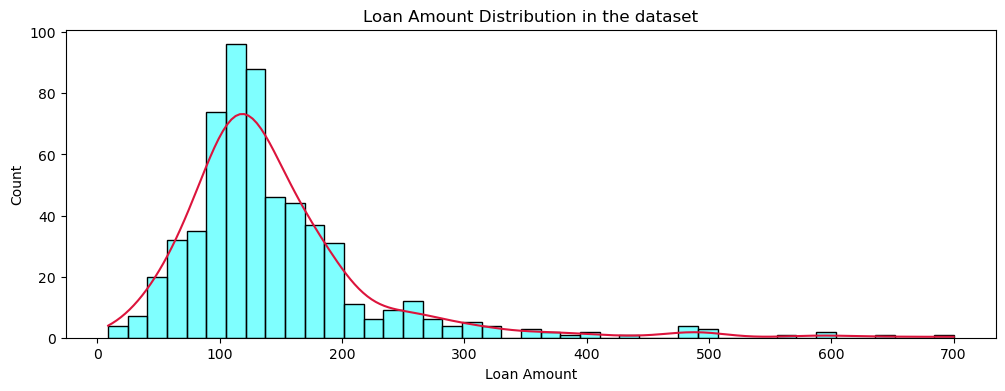

In [27]:
#Loan Amount Distribution
plt.figure(figsize=(12,4))
plt.title('Loan Amount Distribution in the dataset')
ax=sns.histplot(x=df.loanamount,kde=True,color = 'cyan')
ax.lines[0].set_color('crimson')
plt.xlabel('Loan Amount')
plt.show()

## Bivariate Analysis

In [28]:
df.sample(1)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
423,LP002362,Male,Yes,1,Graduate,No,7250,1667.0,110.0,NaN,0.0,Urban,N


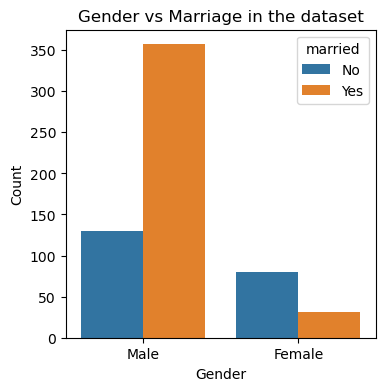

In [29]:
#Gender vs Married
plt.figure(figsize=(4,4))
plt.title('Gender vs Marriage in the dataset')
sns.countplot(data = df, x='gender', hue = 'married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

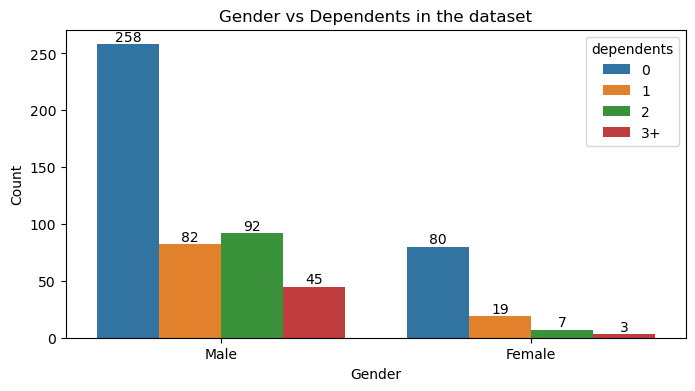

In [30]:
#Gender vs Dependents
plt.figure(figsize=(8,4))
plt.title('Gender vs Dependents in the dataset')
ax=sns.countplot(data = df, x='gender', hue = 'dependents')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

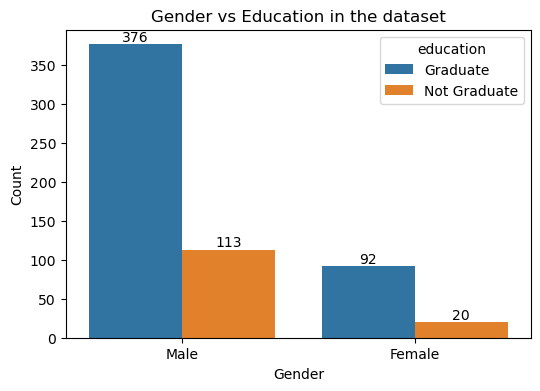

In [31]:
#Gender vs Education
plt.figure(figsize=(6,4))
plt.title('Gender vs Education in the dataset')
ax=sns.countplot(data = df, x='gender', hue = 'education')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

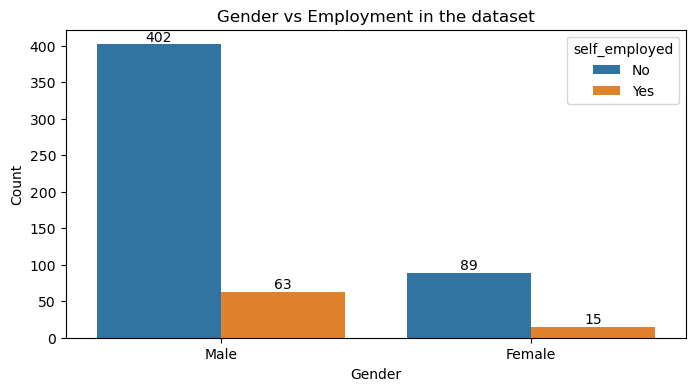

In [32]:
#Gender vs Employment
plt.figure(figsize=(8,4))
plt.title('Gender vs Employment in the dataset')
ax=sns.countplot(data = df, x='gender', hue = 'self_employed')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

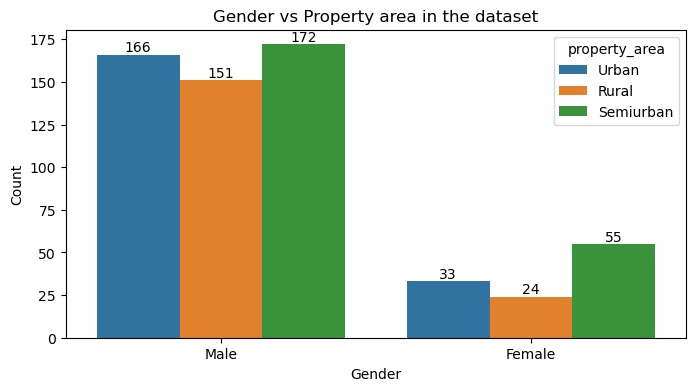

In [33]:
#Gender vs Property Area
plt.figure(figsize=(8,4))
plt.title('Gender vs Property area in the dataset')
ax=sns.countplot(data = df, x='gender', hue = 'property_area')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

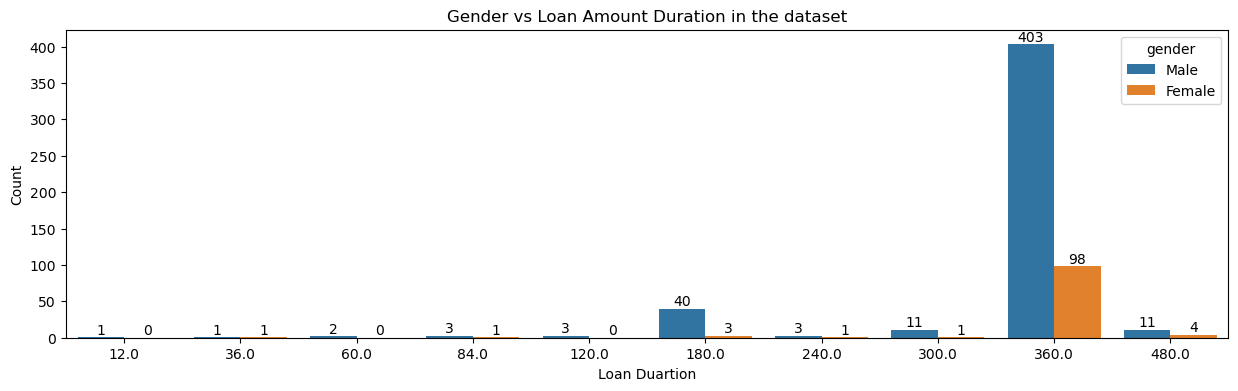

In [34]:
#Gender vs Loan Amount Duration
plt.figure(figsize=(15,4))
plt.title('Gender vs Loan Amount Duration in the dataset')
ax=sns.countplot(data = df, x='loan_amount_term',hue='gender')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Loan Duartion')
plt.ylabel('Count')
plt.show()

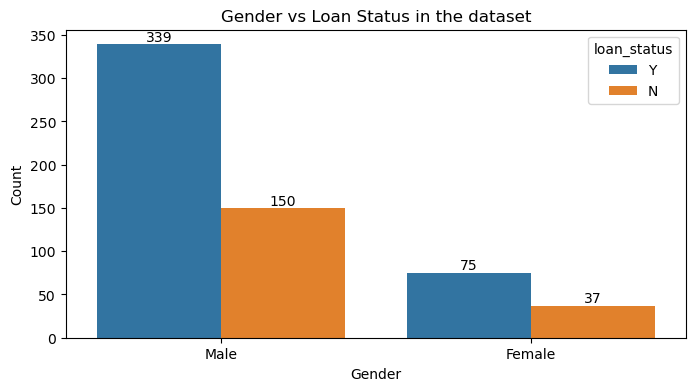

In [35]:
#Gender vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Gender vs Loan Status in the dataset')
ax=sns.countplot(data = df, x='gender', hue = 'loan_status')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

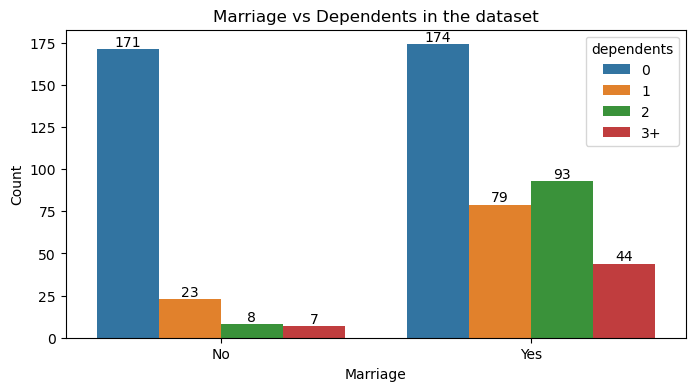

In [36]:
#Marriage vs Dependents
plt.figure(figsize=(8,4))
plt.title('Marriage vs Dependents in the dataset')
ax=sns.countplot(data = df, x='married', hue = 'dependents')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

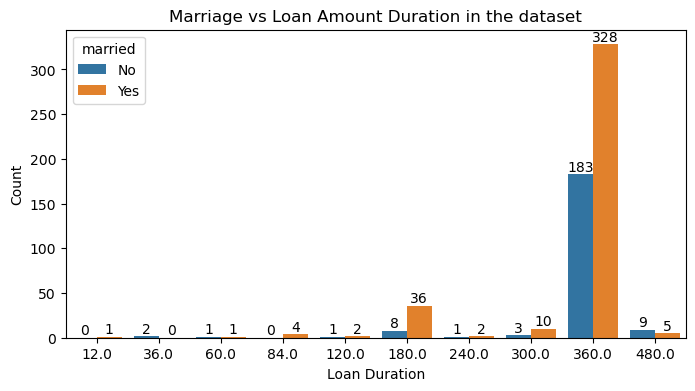

In [37]:
#Marriage vs Loan Amount Term
plt.figure(figsize=(8,4))
plt.title('Marriage vs Loan Amount Duration in the dataset')
ax=sns.countplot(data = df, hue='married',  x= 'loan_amount_term')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel('Loan Duration')
plt.ylabel('Count')
plt.show()

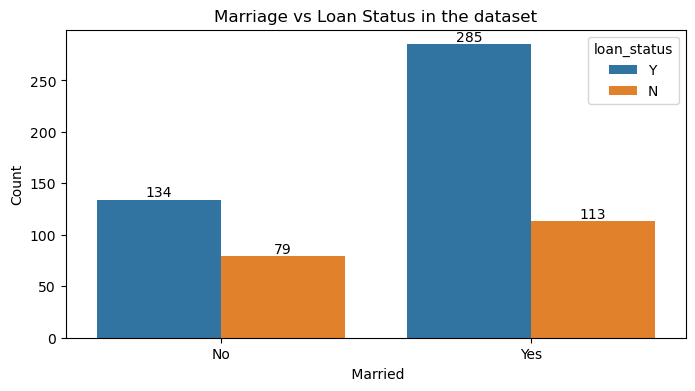

In [38]:
#Marriage vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Marriage vs Loan Status in the dataset')
ax=sns.countplot(data = df, x='married',  hue= 'loan_status')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel(' Married')
plt.ylabel('Count')
plt.show()

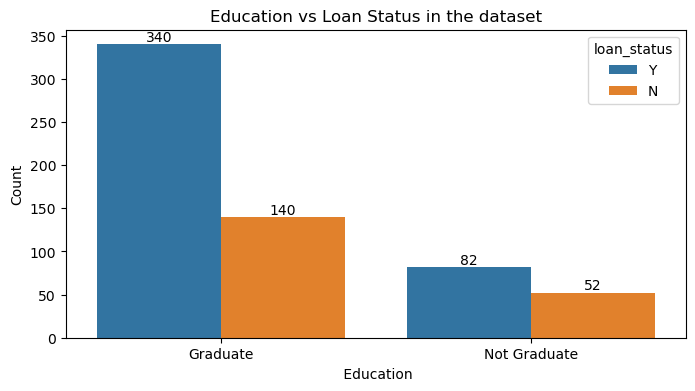

In [39]:
#Education vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Education vs Loan Status in the dataset')
ax=sns.countplot(data = df, x='education',  hue= 'loan_status')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel(' Education')
plt.ylabel('Count')
plt.show()

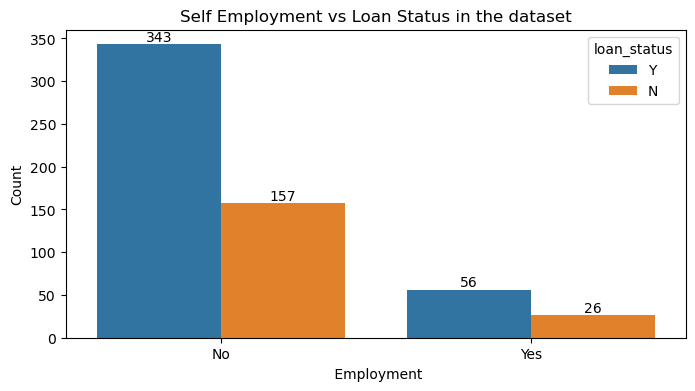

In [40]:
#Self Employment vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Self Employment vs Loan Status in the dataset')
ax=sns.countplot(data = df, x='self_employed',  hue= 'loan_status')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel(' Employment')
plt.ylabel('Count')
plt.show()

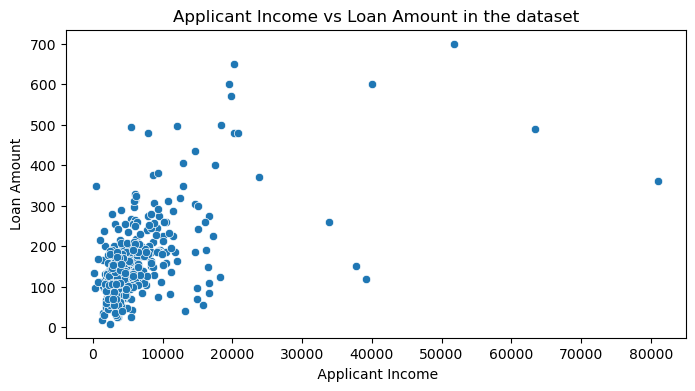

In [41]:
#Applicant Income vs Loan Amount
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loanamount')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

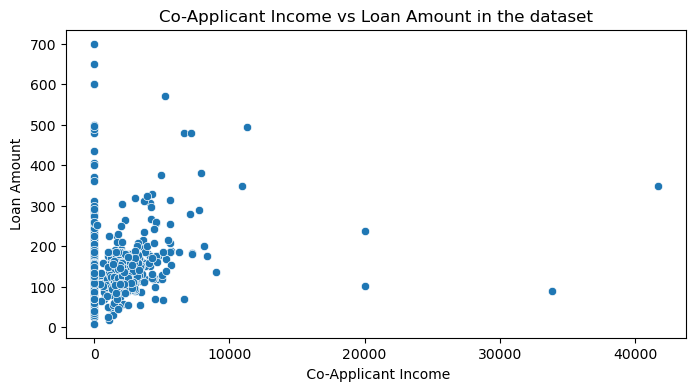

In [42]:
#Co-Applicant Income vs Loan Amount
plt.figure(figsize=(8,4))
plt.title('Co-Applicant Income vs Loan Amount in the dataset')
sns.scatterplot(data = df, x='coapplicantincome',  y= 'loanamount')
plt.xlabel(' Co-Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

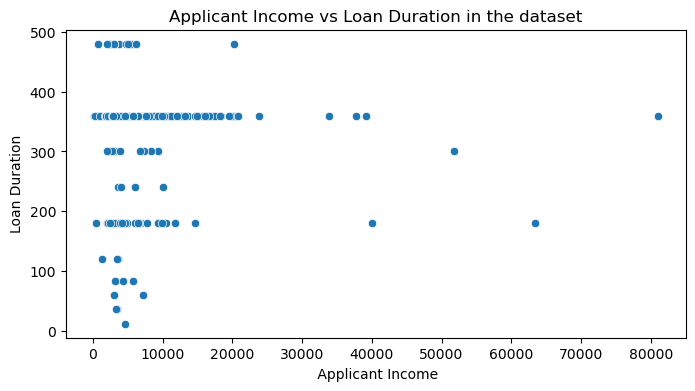

In [43]:
#Applicant Income vs Loan Duartion
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Duration in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loan_amount_term')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Duration')
plt.show()

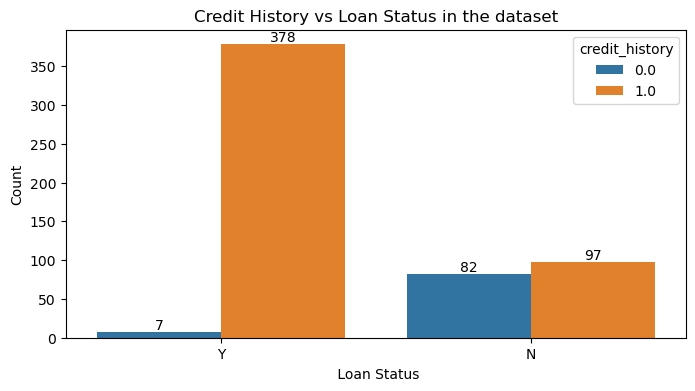

In [44]:
#Credit History vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Credit History vs Loan Status in the dataset')
ax=sns.countplot(data = df, hue='credit_history',  x= 'loan_status')
for label in ax.containers:
    ax.bar_label(label)
plt.xlabel(' Loan Status')
plt.ylabel('Count')
plt.show()

## Multivariate Analysis

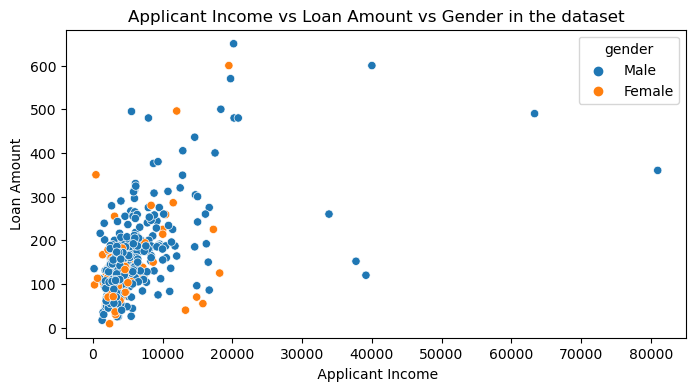

In [45]:
#Applicant Income vs Loan Amount vs Gender
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount vs Gender in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loanamount',hue='gender')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

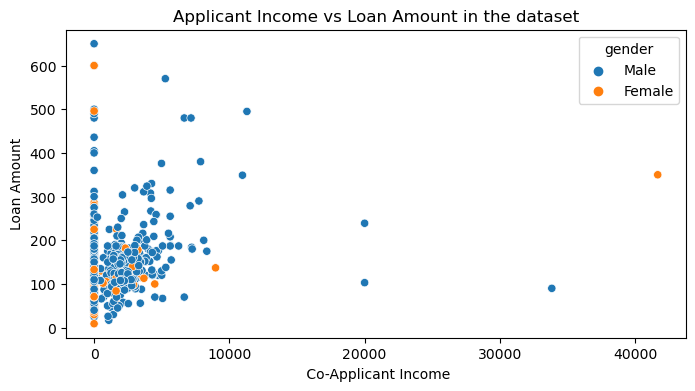

In [46]:
#Co-Applicant Income vs Loan Amount
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount in the dataset')
sns.scatterplot(data = df, x='coapplicantincome',  y= 'loanamount',hue='gender')
plt.xlabel(' Co-Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

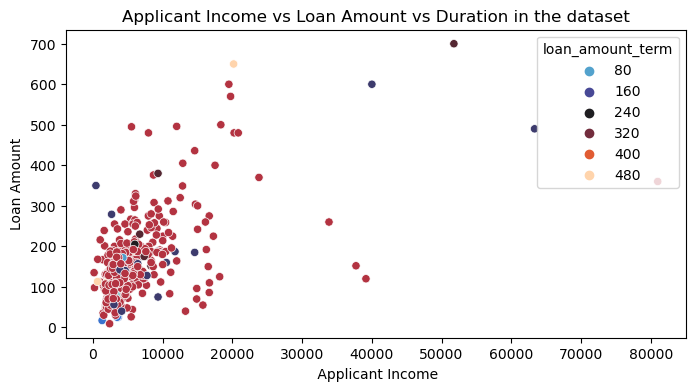

In [47]:
#Applicant Income vs Loan Amount vs Duration
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount vs Duration in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loanamount', hue='loan_amount_term',palette='icefire')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

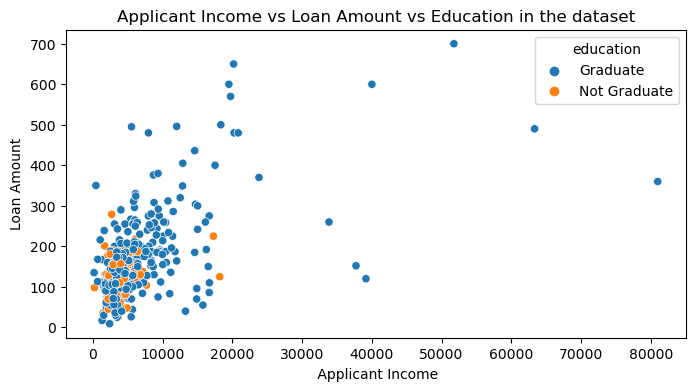

In [48]:
#Applicant Income vs Loan Amount vs education
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount vs Education in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loanamount',hue='education')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

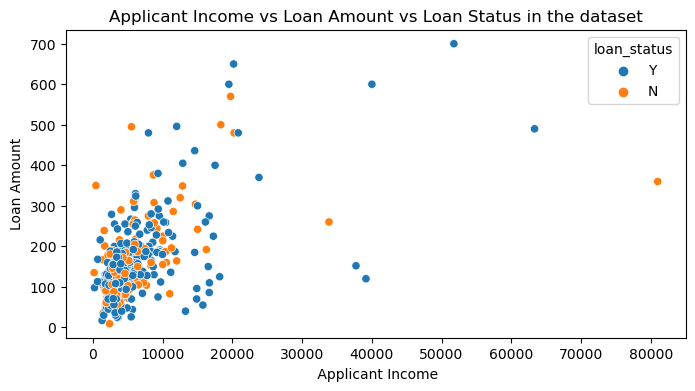

In [49]:
#Applicant Income vs Loan Amount vs Loan Status
plt.figure(figsize=(8,4))
plt.title('Applicant Income vs Loan Amount vs Loan Status in the dataset')
sns.scatterplot(data = df, x='applicantincome',  y= 'loanamount',hue='loan_status')
plt.xlabel(' Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

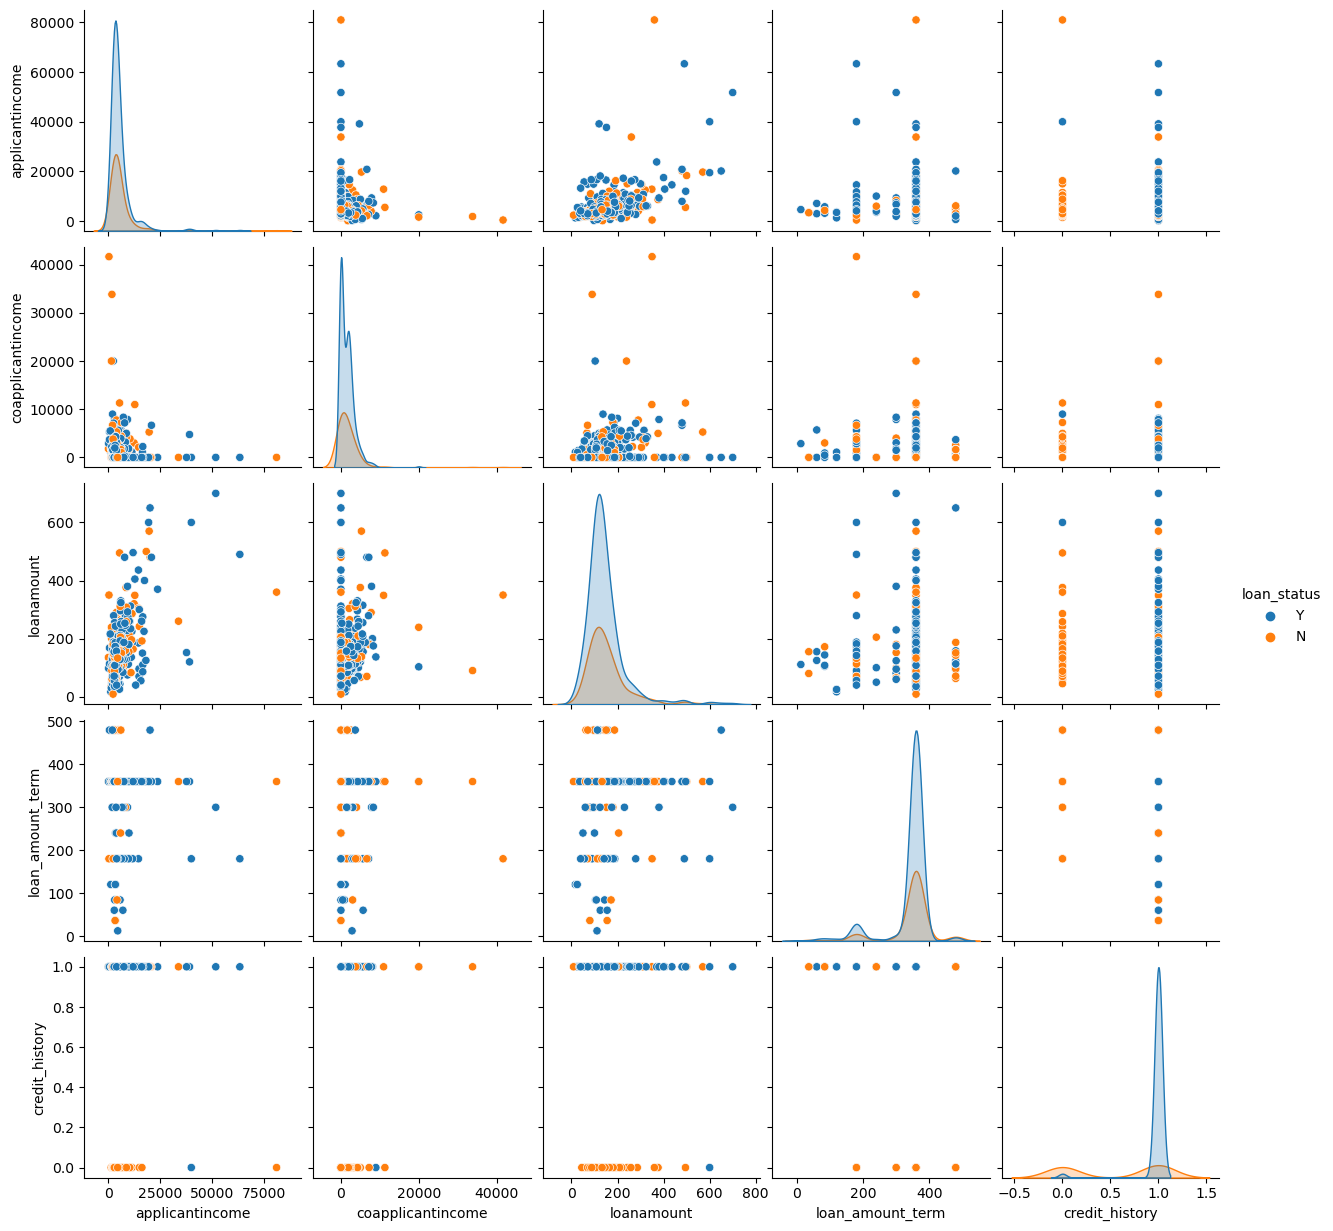

In [50]:
sns.pairplot(df,hue='loan_status')

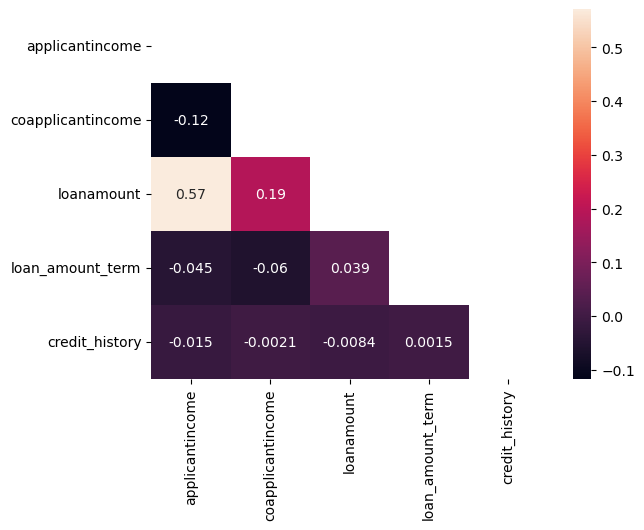

In [51]:
mask = np.triu(df[num_cols].corr())
sns.heatmap(df[num_cols].corr(),annot=True,mask=mask)
plt.show()

## Checking for outliers

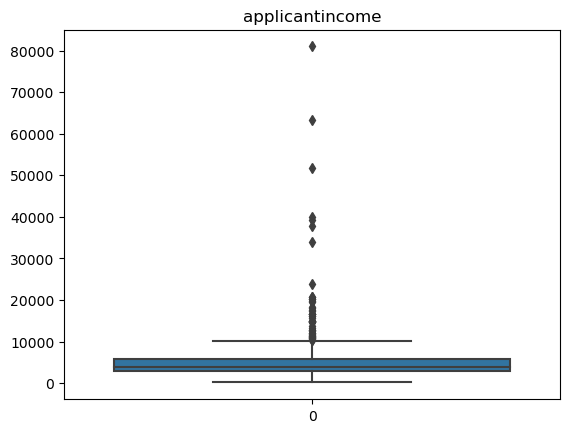

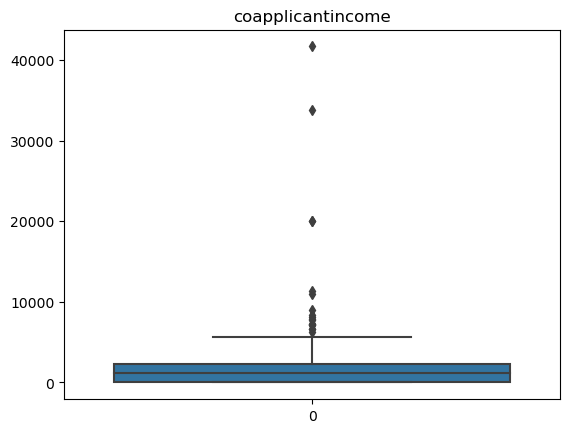

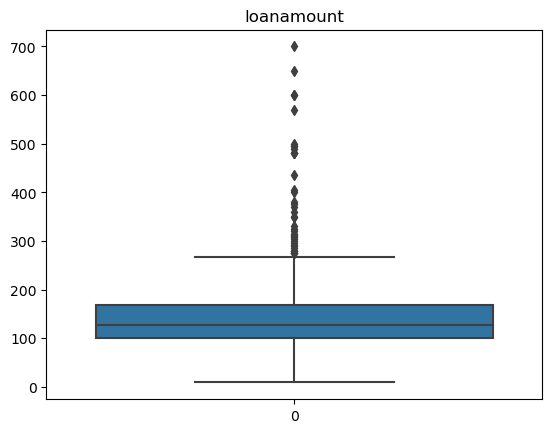

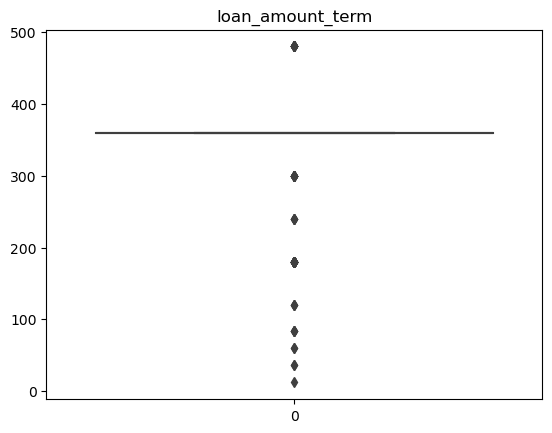

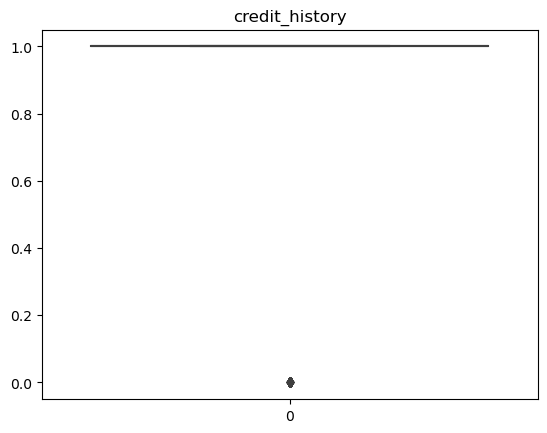

In [52]:
for col in df[num_cols]:
    plt.figure()
    plt.title(col)
    sns.boxplot(df[col])

## Handling Missing Values

In [53]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [54]:
df[num_cols].isnull().sum()

applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
dtype: int64

In [55]:
df['credit_history'] = df['credit_history'].replace({1.0:'1',0.0:'0'})

In [56]:
df['credit_history'].dtypes

dtype('O')

In [57]:
cat_cols = ['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'credit_history',
 'property_area',
 'loan_status',
 'loan_amount_term']

In [58]:
num_cols = ['applicantincome', 'coapplicantincome', 'loanamount']

In [59]:
for col in df[cat_cols]:
    df[col]=df[col].fillna(df[col].mode()[0])

In [60]:
for col in df[num_cols]:
    df[col] = df[col].fillna(df[col].mean())

In [61]:
df[cat_cols].isnull().sum()

loan_id             0
gender              0
married             0
dependents          0
education           0
self_employed       0
credit_history      0
property_area       0
loan_status         0
loan_amount_term    0
dtype: int64

In [62]:
df[num_cols].isnull().sum()

applicantincome      0
coapplicantincome    0
loanamount           0
dtype: int64

In [63]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

## Handling Outliers

In [64]:
olc = df[['applicantincome', 'coapplicantincome', 'loanamount']]

In [65]:
from scipy.stats import zscore
zs = np.abs(zscore(olc))
zs

,applicantincome,coapplicantincome,loanamount
0,0.072991,0.554487,0.000000
1,0.134412,0.038732,0.219273
2,0.393747,0.554487,0.957641
3,0.462062,0.251980,0.314547
4,0.097728,0.554487,0.064454
...,...,...,...
609,0.410130,0.554487,0.898095
610,0.212557,0.554487,1.267279
611,0.437174,0.472404,1.269371
612,0.357064,0.554487,0.483367


In [66]:
# Creating new dataframe
df_zs = df[(zs<3).all(axis=1)]
df_zs.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


In [67]:
df.shape

(614, 13)

In [68]:
df_zs.shape

(589, 13)

In [69]:
# 1st quantile
Q1 = olc.quantile(0.25)
# 3rd quantile
Q3 = olc.quantile(0.75)
# IQR
IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\3070196083.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [70]:
df_iqr.shape

(535, 13)

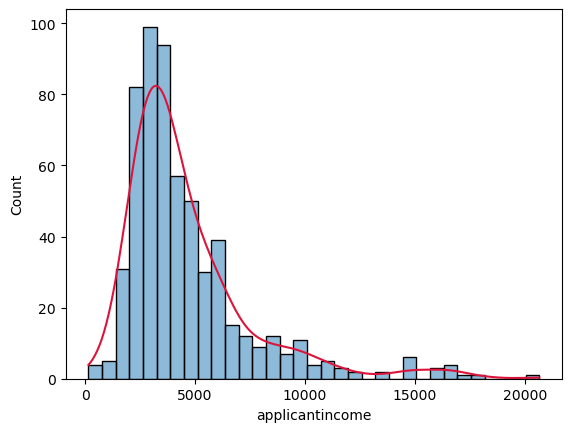

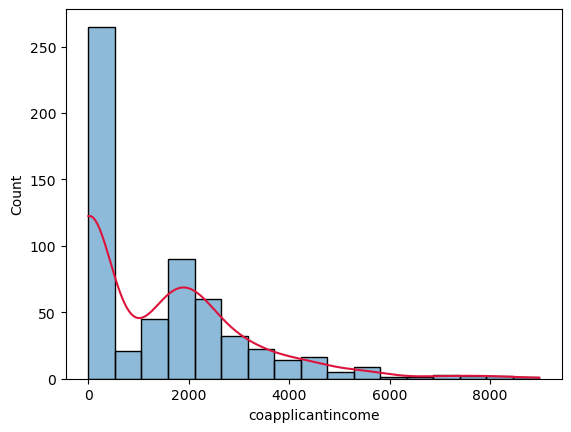

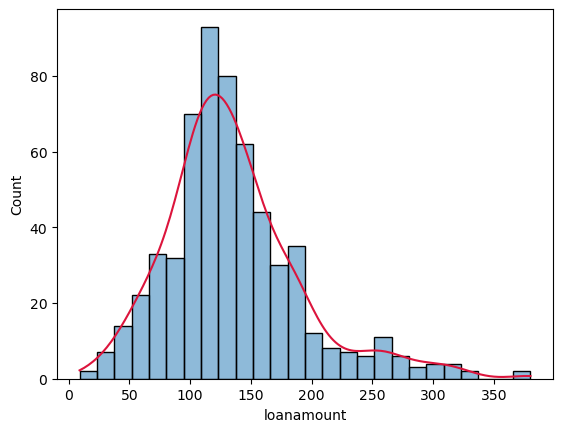

In [71]:
for col in df_zs[num_cols]:
    plt.figure()
    ax=sns.histplot(df_zs[col],kde=True)
    ax.lines[0].set_color('crimson')

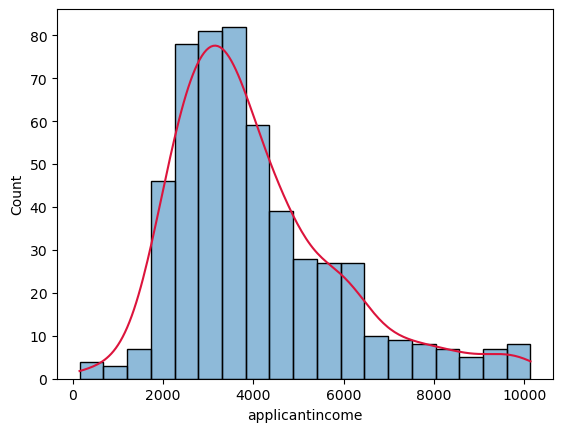

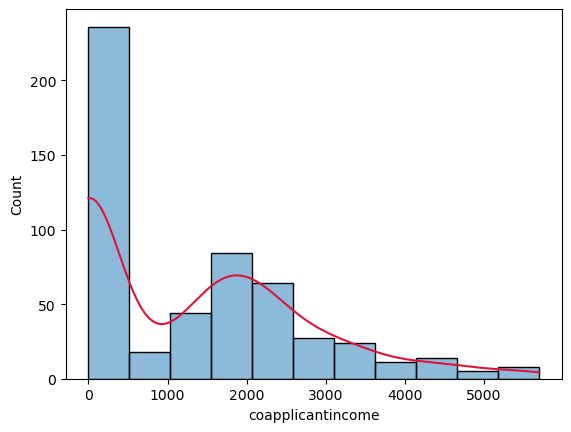

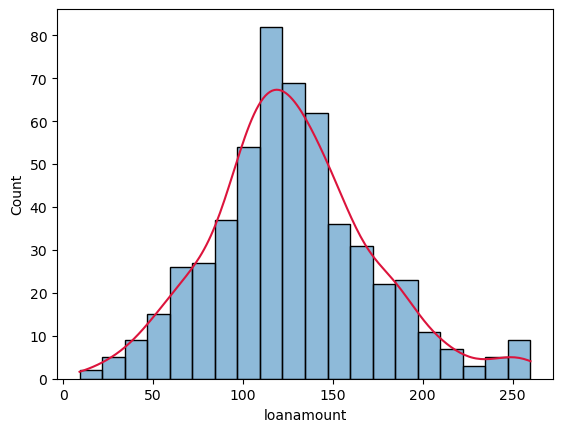

In [72]:
for col in df_iqr[num_cols]:
    plt.figure()
    ax=sns.histplot(df_iqr[col],kde=True)
    ax.lines[0].set_color('crimson')

In [73]:
#df_zs['applicantincome'] = np.log(df['applicantincome'])
#df_zs['coapplicantincome'] = np.log1p(df['coapplicantincome'])

In [74]:
#for col in df_zs[num_cols]:
 #   plt.figure()
  #  ax=sns.histplot(df_zs[col],kde=True)
   # ax.lines[0].set_color('crimson')

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [76]:
skewed_features = ["applicantincome","coapplicantincome"]

In [77]:
df_zs[skewed_features] = scaler.fit_transform(df_zs[skewed_features].values)
df_zs[skewed_features].head()

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\2510934440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zs[skewed_features] = scaler.fit_transform(df_zs[skewed_features].values)


,applicantincome,coapplicantincome
0,0.688986,-1.119438
1,0.239843,0.748807
2,-0.525799,-1.119438
3,-0.791841,0.899419
4,0.736280,-1.119438


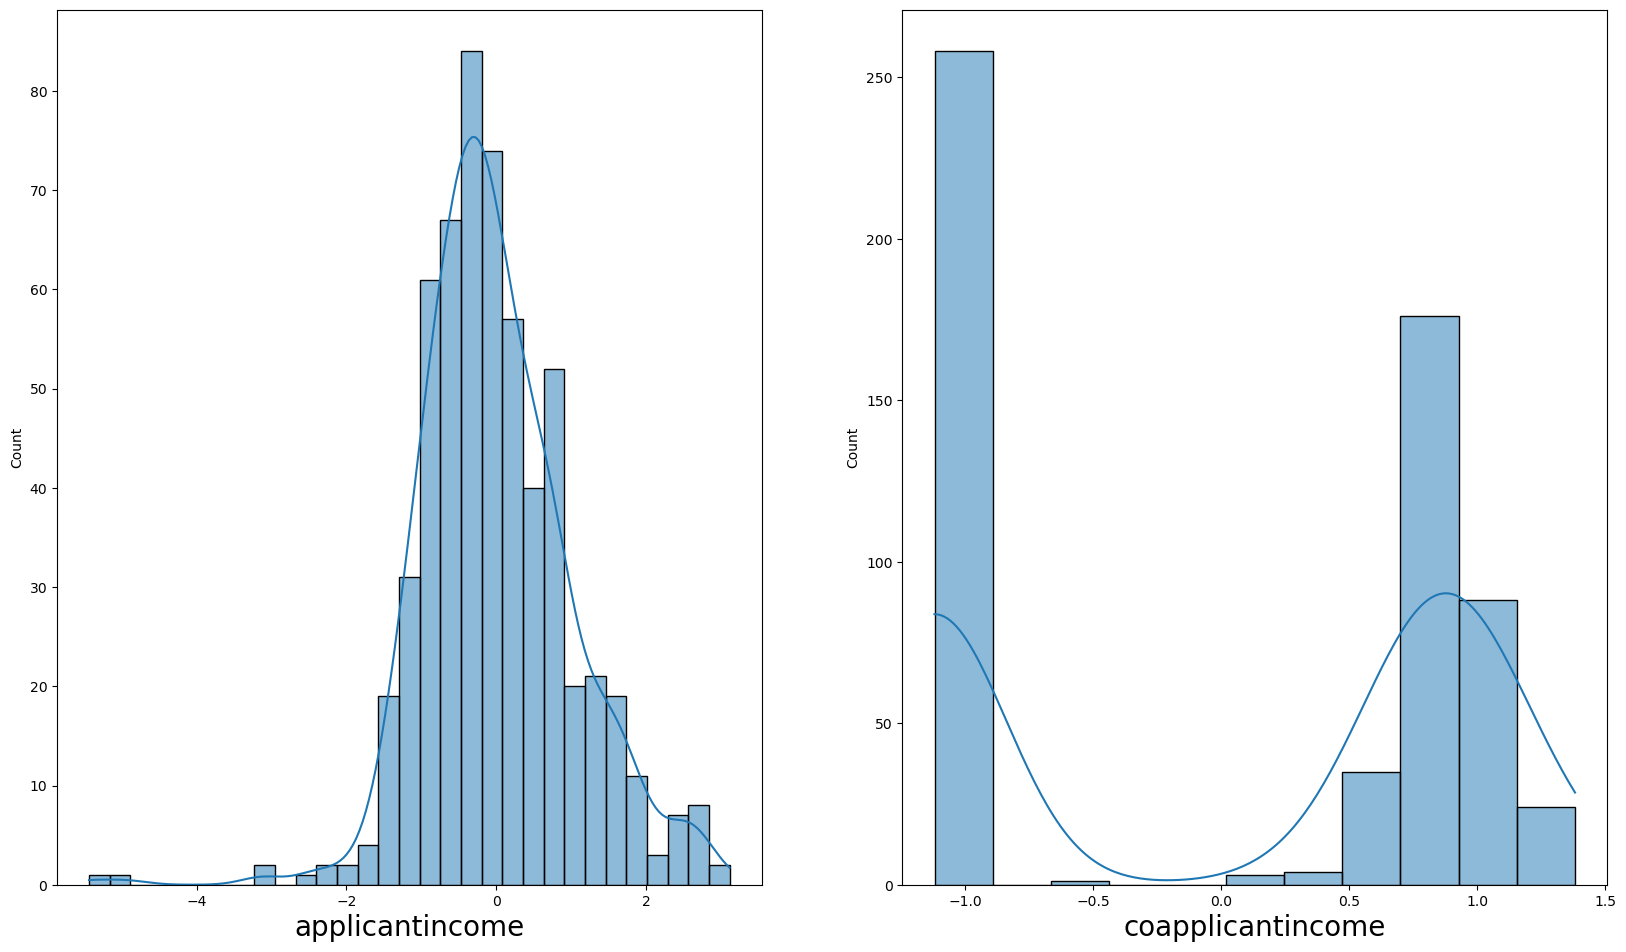

In [78]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(df_zs[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [79]:
df_zs.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,0.688986,-1.119438,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.239843,0.748807,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.525799,-1.119438,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.791841,0.899419,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.736280,-1.119438,141.000000,360.0,1,Urban,Y


In [80]:
cat_cols

['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'credit_history',
 'property_area',
 'loan_status',
 'loan_amount_term']

In [81]:
df_zs['self_employed'] = df_zs['self_employed'].replace({'Yes':1, 'No':0})
df_zs['loan_status'] = df_zs['loan_status'].replace({'Yes':1, 'No':0})
df_zs['property_area'] = df_zs['property_area'].replace({'Urban':1, 'Semiurban':1,'Rural':0})
df_zs['dependents'] = df_zs['dependents'].replace({'0':0, '1':1,'2':1, '3+':1})
df_zs['gender'] = df_zs['gender'].replace({'Male':0, 'Female':1})
df_zs['married'] = df_zs['married'].replace({'Yes':1, 'No':0})
df_zs['education'] = df_zs['education'].replace({'Graduate':1, 'Not Graduate':0})

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\1123196822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zs['self_employed'] = df_zs['self_employed'].replace({'Yes':1, 'No':0})
C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\1123196822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zs['loan_status'] = df_zs['loan_status'].replace({'Yes':1, 'No':0})
C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\1123196822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [82]:
df_zs.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,0,0,0,1,0,0.688986,-1.119438,146.412162,360.0,1,1,Y
1,LP001003,0,1,1,1,0,0.239843,0.748807,128.000000,360.0,1,0,N
2,LP001005,0,1,0,1,1,-0.525799,-1.119438,66.000000,360.0,1,1,Y
3,LP001006,0,1,0,0,0,-0.791841,0.899419,120.000000,360.0,1,1,Y
4,LP001008,0,0,0,1,0,0.736280,-1.119438,141.000000,360.0,1,1,Y


In [83]:
df_zs.drop('loan_id',axis=1,inplace=True)

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10948\1786576747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zs.drop('loan_id',axis=1,inplace=True)


In [84]:
X= df_zs.drop('loan_status',axis=1)
y= df_zs['loan_status']

In [85]:
X.shape

(589, 11)

In [86]:
y.shape

(589,)

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
X_resample,y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [89]:
print(X_resample.shape)

(814, 11)


In [90]:
print(y_resample.shape)

(814,)


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=0)

In [93]:
y_test.shape

(163,)

## Modelling

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.8650306748466258  on Random_state  183


In [95]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2, random_state =35)

In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
print('Training_accuracy: ',lr.score(X_train,y_train))
print('Testing_accuracy: ',lr.score(X_test,y_test))

Training_accuracy:  0.8018433179723502
Testing_accuracy:  0.8220858895705522


In [100]:
acc = accuracy_score(y_test,y_pred)

In [101]:
acc

0.8220858895705522

In [102]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.84      0.79      0.82        82
           Y       0.80      0.85      0.83        81

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



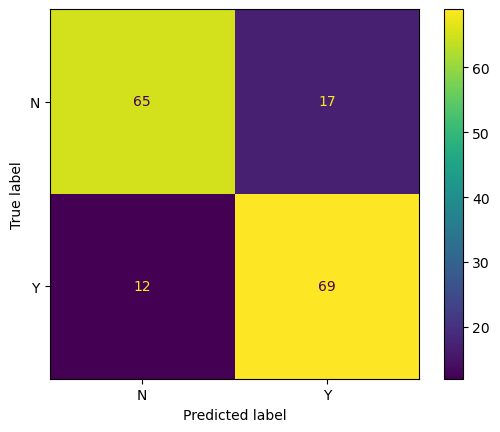

In [104]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

In [105]:
import pickle

In [106]:
with open('model','wb') as f:
    pickle.dump(lr,f)